In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load data
raw_data = pd.read_csv('Automobile_data.csv')

In [3]:
unprocessed = raw_data.copy()

In [4]:
unprocessed.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
#Identify missing variables
unprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
# Grouping string datatypes
strings = unprocessed.columns[unprocessed.dtypes == 'object']

In [7]:
#Printing out the amount of columns that has a question mark
print(f"{'Variable':^{15}}{'Total Missing':^{50}}{'% Missing':^{10}}")
for i in strings:
    print(f"{i:{25}}{(unprocessed[i] == '?').sum():^{30}}{((unprocessed[i] == '?').sum()*100/unprocessed.shape[0]).round(2):^{30}}")

   Variable                      Total Missing                   % Missing 
normalized-losses                      41                           20.0             
make                                   0                            0.0              
fuel-type                              0                            0.0              
aspiration                             0                            0.0              
num-of-doors                           2                            0.98             
body-style                             0                            0.0              
drive-wheels                           0                            0.0              
engine-location                        0                            0.0              
engine-type                            0                            0.0              
num-of-cylinders                       0                            0.0              
fuel-system                            0                        

In [8]:
# Drop missing price rows since it is only 4 missing values
unprocessed = unprocessed[unprocessed['price'] != '?']

In [9]:
# Drop missing num-of-doors rows since it is only 2 missing values
unprocessed = unprocessed[unprocessed['num-of-doors'] != '?']

In [10]:
#Printing out the amount of columns that has a question mark
print(f"{'Variable':^{15}}{'Total Missing':^{50}}{'% Missing':^{10}}")
for i in strings:
    print(f"{i:{25}}{(unprocessed[i] == '?').sum():^{30}}{((unprocessed[i] == '?').sum()*100/unprocessed.shape[0]).round(2):^{30}}")

   Variable                      Total Missing                   % Missing 
normalized-losses                      36                          18.09             
make                                   0                            0.0              
fuel-type                              0                            0.0              
aspiration                             0                            0.0              
num-of-doors                           0                            0.0              
body-style                             0                            0.0              
drive-wheels                           0                            0.0              
engine-location                        0                            0.0              
engine-type                            0                            0.0              
num-of-cylinders                       0                            0.0              
fuel-system                            0                        

In [11]:
#Printing out the number of uniques

for i in strings:
    print(f"{i}\n{unprocessed[i].unique()}")
    print()

normalized-losses
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']

make
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

fuel-type
['gas' 'diesel']

aspiration
['std' 'turbo']

num-of-doors
['two' 'four']

body-style
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

drive-wheels
['rwd' 'fwd' '4wd']

engine-location
['front' 'rear']

engine-type
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']

num-of-cylinders
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']

fuel-system
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']

bore
['3.47' '2.68' '3.19' '3.13' '3.5' '3

In [12]:
# Convert certain object datatypes to int64,float and use 0 as a placeholder
i64 = unprocessed[['normalized-losses','horsepower', 'peak-rpm','price']]
f = unprocessed[['bore','stroke']]

for j in i64:
    try:
        unprocessed[j] = unprocessed[j].astype('int64')
    except:
        unprocessed[j] = unprocessed[j].replace('?',0).astype('int64')
for k in f:
    try:
        unprocessed[k] = unprocessed[k].astype('float')
    except:
        unprocessed[k] = unprocessed[k].replace('?',0).astype('float')


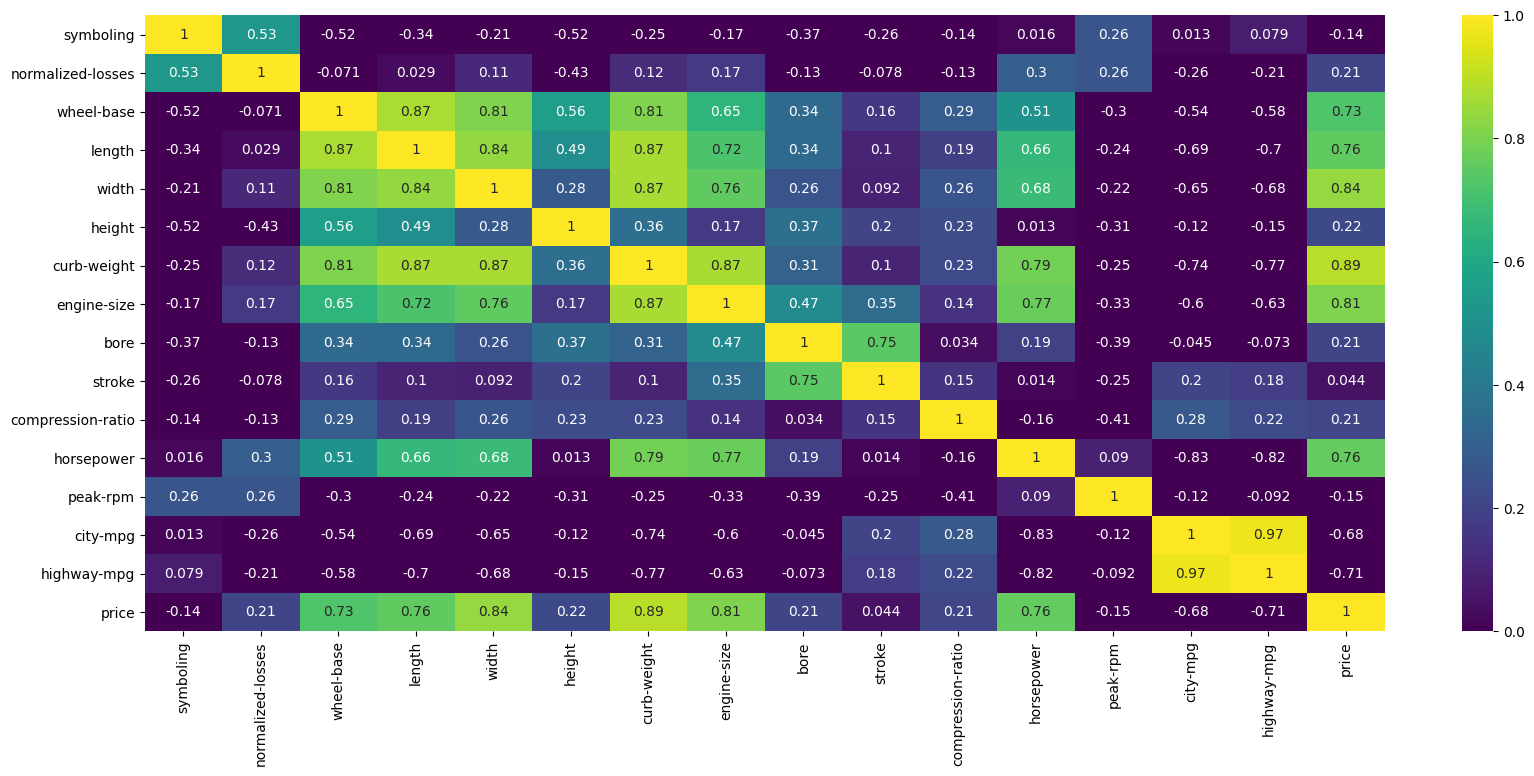

In [13]:
# Symboling variable has a 50% correlation with the known normalized-losses variable 
plt.figure(figsize=(20,8))

sns.heatmap((unprocessed[unprocessed['normalized-losses'] > 0]).corr(),annot=True,cmap='viridis',vmin=0,vmax=1)
plt.show()

In [14]:
# Import Linear Regression
from sklearn.linear_model import LinearRegression

#Create an instance of Linear Regression and Scaler
lr = LinearRegression()

In [15]:
#Known normalized losses
known_nl = unprocessed[unprocessed['normalized-losses'] > 0]

In [16]:
known_nl

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [17]:
sym = known_nl['symboling']
nl = known_nl['normalized-losses']

In [18]:
lr.fit(sym.values.reshape(-1,1),nl)

LinearRegression()

In [19]:
# Unknown normalized-losses
unknown_nl = unprocessed[unprocessed['normalized-losses'] == 0]

In [20]:
unknown_nl

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,1,0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
14,1,0,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,0,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,0,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,0,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880
43,0,0,isuzu,gas,std,four,sedan,rwd,front,94.3,...,111,2bbl,3.31,3.23,8.5,78,4800,24,29,6785


In [21]:
unknown_nl = unknown_nl.drop('normalized-losses',axis=1)

In [22]:
unknown_nl

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,1,audi,gas,std,four,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
14,1,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880
43,0,isuzu,gas,std,four,sedan,rwd,front,94.3,170.7,...,111,2bbl,3.31,3.23,8.5,78,4800,24,29,6785


In [23]:
new_pred = lr.predict(unknown_nl['symboling'].values.reshape(-1,1))

In [24]:
new_pred

array([155.55511022, 155.55511022, 125.0246493 , 140.28987976,
       125.0246493 , 125.0246493 , 109.75941884, 109.75941884,
       109.75941884, 109.75941884, 140.28987976, 109.75941884,
       109.75941884, 109.75941884,  94.49418838, 109.75941884,
       125.0246493 , 125.0246493 , 155.55511022, 155.55511022,
       155.55511022, 109.75941884, 109.75941884, 109.75941884,
       109.75941884, 155.55511022, 155.55511022, 155.55511022,
       155.55511022, 109.75941884, 140.28987976,  94.49418838,
       155.55511022, 109.75941884, 109.75941884, 109.75941884])

In [25]:
unknown_nl['normalized-losses'] = new_pred

In [26]:
unknown_nl

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,normalized-losses
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,155.555110
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,155.555110
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,125.024649
5,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,...,mpfi,3.19,3.40,8.5,110,5500,19,25,15250,140.289880
7,1,audi,gas,std,four,wagon,fwd,front,105.8,192.7,...,mpfi,3.19,3.40,8.5,110,5500,19,25,18920,125.024649
14,1,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,...,mpfi,3.31,3.19,9.0,121,4250,20,25,24565,125.024649
15,0,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,...,mpfi,3.62,3.39,8.0,182,5400,16,22,30760,109.759419
16,0,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,...,mpfi,3.62,3.39,8.0,182,5400,16,22,41315,109.759419
17,0,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,...,mpfi,3.62,3.39,8.0,182,5400,15,20,36880,109.759419
43,0,isuzu,gas,std,four,sedan,rwd,front,94.3,170.7,...,2bbl,3.31,3.23,8.5,78,4800,24,29,6785,109.759419


In [27]:
unprocessed = pd.concat([unknown_nl, known_nl],axis=0)

In [31]:
unprocessed

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,normalized-losses
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,155.555110
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,155.555110
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,125.024649
5,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,...,mpfi,3.19,3.40,8.5,110,5500,19,25,15250,140.289880
7,1,audi,gas,std,four,wagon,fwd,front,105.8,192.7,...,mpfi,3.19,3.40,8.5,110,5500,19,25,18920,125.024649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845,95.000000
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045,95.000000
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,95.000000
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470,95.000000


In [32]:
# Get Dummies 

dummy_1 = pd.get_dummies(unprocessed[['fuel-type','aspiration','num-of-doors','engine-location']],drop_first=True)

In [33]:
# Add new dummies to dataframe

unprocessed = pd.concat([unprocessed,dummy_1],axis=1)

In [34]:
#Drop original columns
unprocessed = unprocessed.drop(['fuel-type','aspiration','num-of-doors',
             'engine-location'],axis=1)

In [35]:
unprocessed

,symboling,make,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,normalized-losses,fuel-type_gas,aspiration_turbo,num-of-doors_two,engine-location_rear
0,3,alfa-romero,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,...,111,5000,21,27,13495,155.555110,1,0,1,0
1,3,alfa-romero,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,...,111,5000,21,27,16500,155.555110,1,0,1,0
2,1,alfa-romero,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,...,154,5000,19,26,16500,125.024649,1,0,1,0
5,2,audi,sedan,fwd,99.8,177.3,66.3,53.1,2507,ohc,...,110,5500,19,25,15250,140.289880,1,0,1,0
7,1,audi,wagon,fwd,105.8,192.7,71.4,55.7,2954,ohc,...,110,5500,19,25,18920,125.024649,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,sedan,rwd,109.1,188.8,68.9,55.5,2952,ohc,...,114,5400,23,28,16845,95.000000,1,0,0,0
201,-1,volvo,sedan,rwd,109.1,188.8,68.8,55.5,3049,ohc,...,160,5300,19,25,19045,95.000000,1,1,0,0
202,-1,volvo,sedan,rwd,109.1,188.8,68.9,55.5,3012,ohcv,...,134,5500,18,23,21485,95.000000,1,0,0,0
203,-1,volvo,sedan,rwd,109.1,188.8,68.9,55.5,3217,ohc,...,106,4800,26,27,22470,95.000000,0,1,0,0


In [36]:
# The multi-port fuel injection is the most commonly used fuel system

unprocessed['fuel-system'].value_counts()

mpfi    91
2bbl    64
idi     19
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuel-system, dtype: int64

In [37]:
# Sedan was the most common vehicle in the yearbook 

unprocessed['body-style'].value_counts()

sedan          92
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [38]:
# The most common car seen was the front wheel drive

unprocessed['drive-wheels'].value_counts()

fwd    116
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

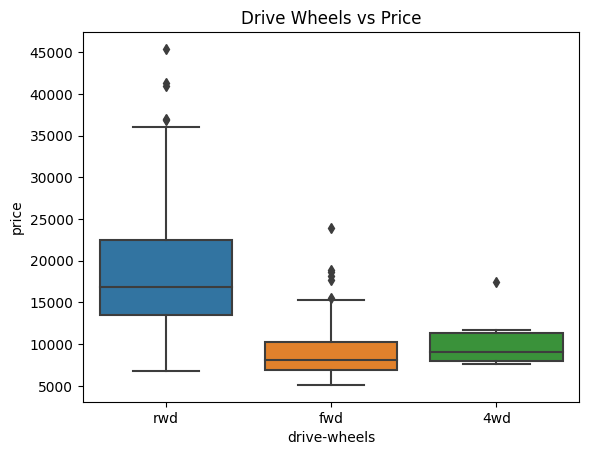

In [39]:
# The rear wheel drive seems to show up in vehicles that are more expensive, whereas fwd seems much 
# more affordable for consumers

sns.boxplot(data=unprocessed,x='drive-wheels',y='price')
plt.title('Drive Wheels vs Price')
plt.show()

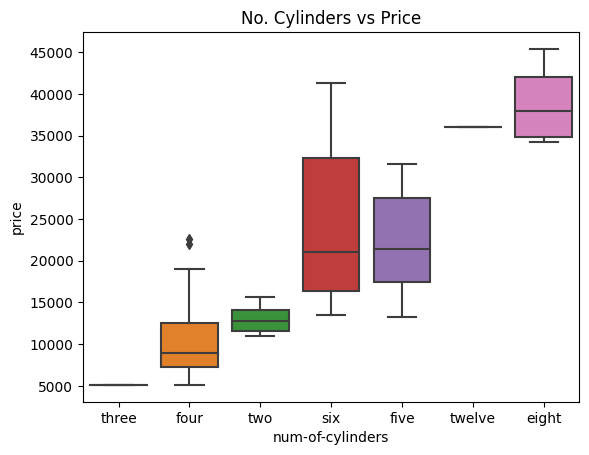

In [40]:
# Number of Cylinders vs Price
sns.boxplot(data=unprocessed,x='num-of-cylinders',y='price',order=['three','four','two','six','five',
                                                                       'twelve','eight'])
plt.title('No. Cylinders vs Price')
plt.show()

In [41]:
# From what was online, there are pros/cons when it comes to cylinders. I did have a difficult time
# finding more information on this, but I believe it is mainly my lack of knowledge regarding the world
# of automobiles. This prevented me from using proper keywords or terminologies needed to find the answer to
# my question.

# Going by the graph, the more cylinders inside a vehicle the higher the price.

In [42]:
# Decided to just keep the num-of-cylinders and change it to int 64
unprocessed['num-of-cylinders'] = unprocessed['num-of-cylinders'].map({'four':4, 'six':6, 
                                                'five':5,'three':3,'twelve':12, 'two':2, 'eight':8})

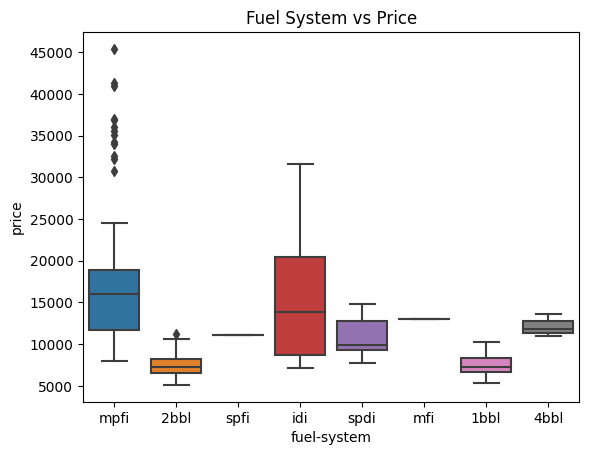

In [43]:
# mpfi is the most commonly used in vehicles now, so I'm assuming 
# there is a possiblity that many cars used that type of fuel injection
sns.boxplot(data=unprocessed,x='fuel-system',y='price')
plt.title('Fuel System vs Price')
plt.show()

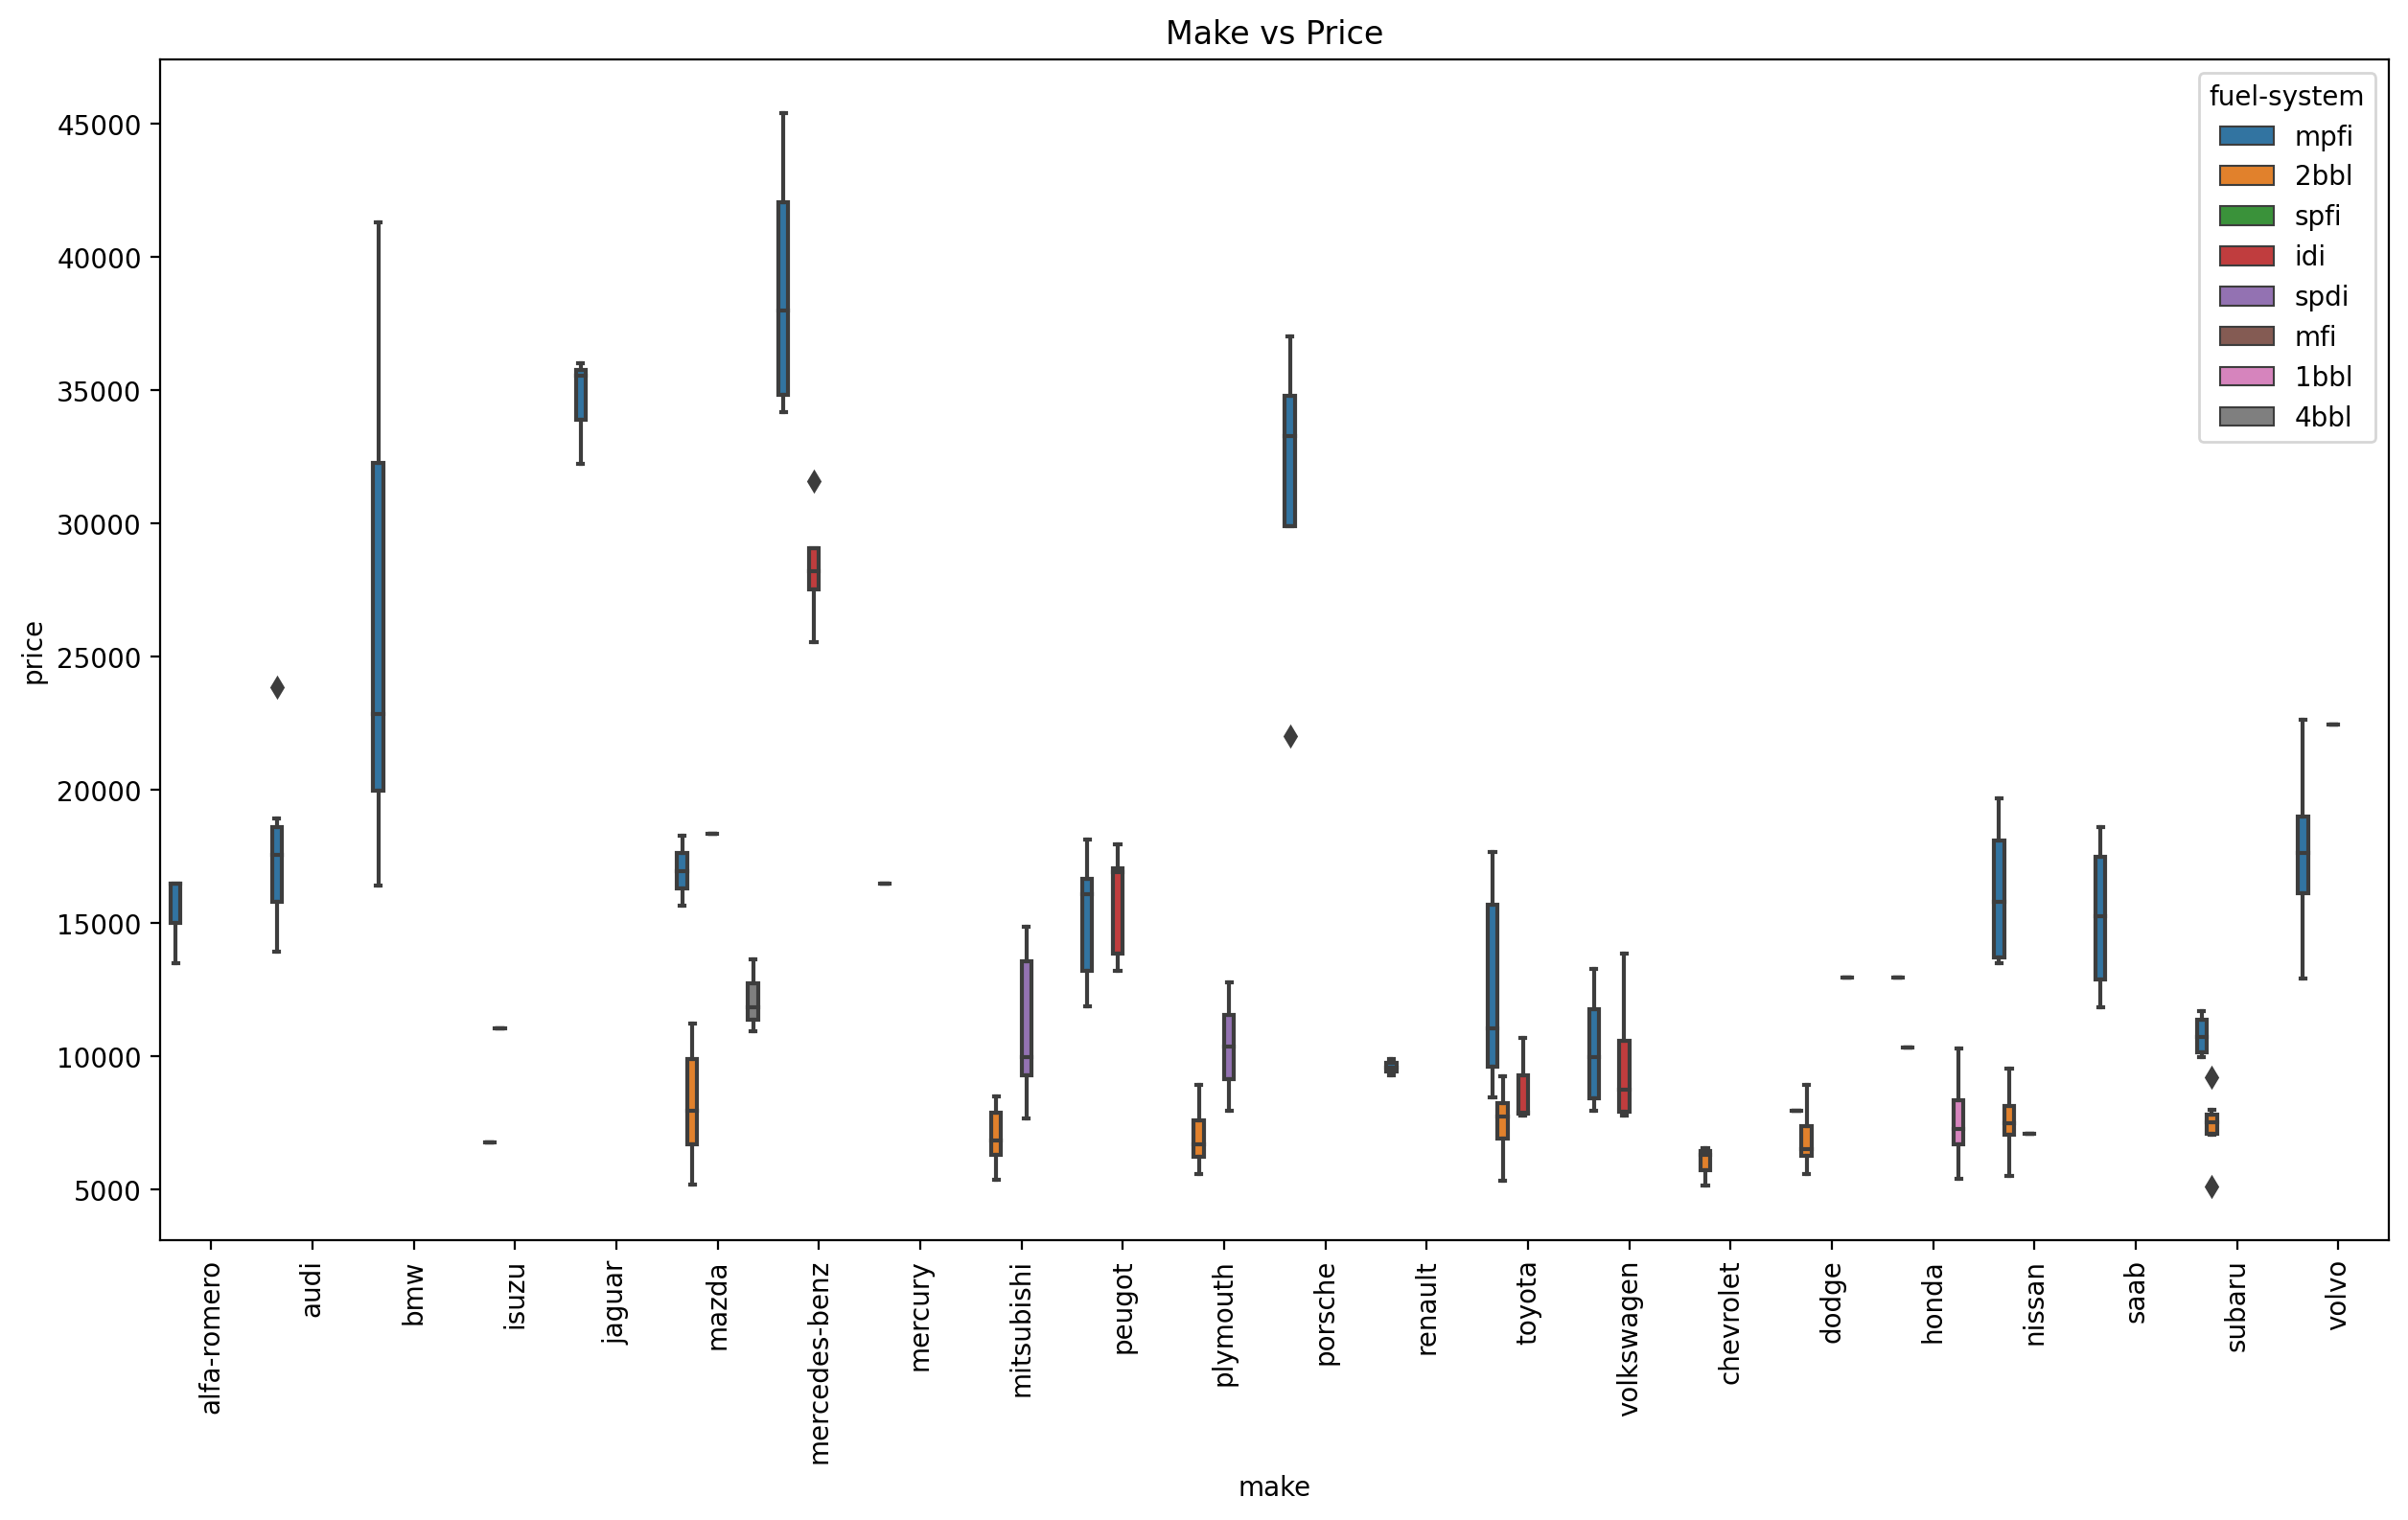

In [44]:
# From the graph itself it seems that the more expensive brands tend to have a mpfi fuel-system
plt.figure(figsize=(15,8),dpi=200)
sns.boxplot(data=unprocessed,x='make',y='price',hue='fuel-system')
plt.title('Make vs Price')
plt.xticks(rotation=90)
plt.show()

In [45]:
# Get Dummies 

dummy_2 = pd.get_dummies(unprocessed['drive-wheels'],drop_first=True)

In [46]:
unprocessed = pd.concat([unprocessed,dummy_2],axis=1)

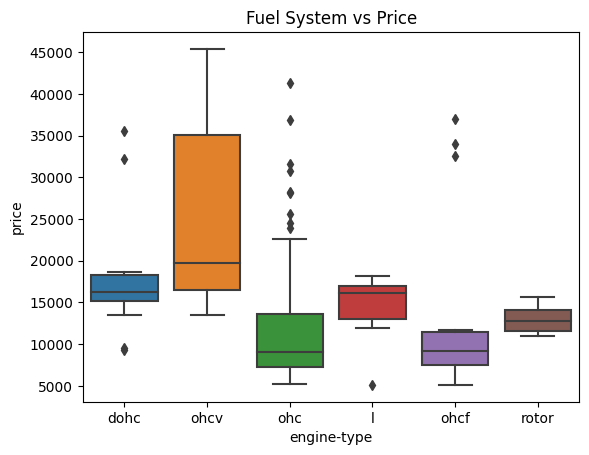

In [47]:
sns.boxplot(data=unprocessed,x='engine-type',y='price')
plt.title('Fuel System vs Price')
plt.show()

In [48]:
# Drop make,body-style,engine-type, and drive-wheels
unprocessed = unprocessed.drop(['drive-wheels','make','engine-type','body-style','fuel-system'],axis=1)